In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/student-graduation-dataset/graduation_dataset.csv')
df['Target_int'] = df['Target'].replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [2]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

<Axes: xlabel='Target'>

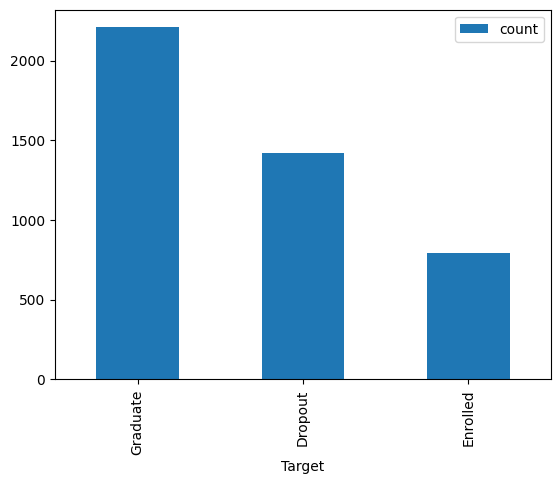

In [3]:
df['Target'].value_counts().plot(kind='bar', legend=True)

Our target variable is unbalanced and we also have a bogie class.

<Axes: >

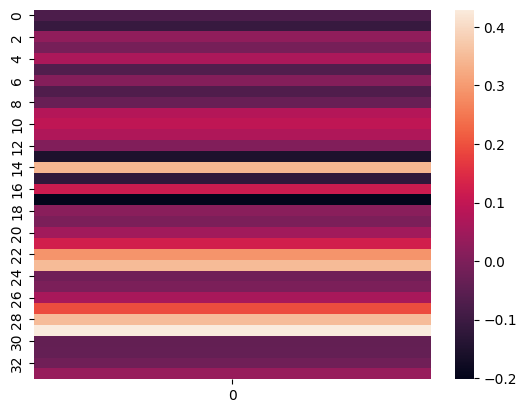

In [4]:
from seaborn import heatmap
heatmap(data=df[[column for column in df.columns.tolist() if not column.startswith('Tar')]].corrwith(axis='rows',
                                                                                                     other=df['Target_int'], ).values.reshape(df.shape[1]-2, 1))

<Axes: >

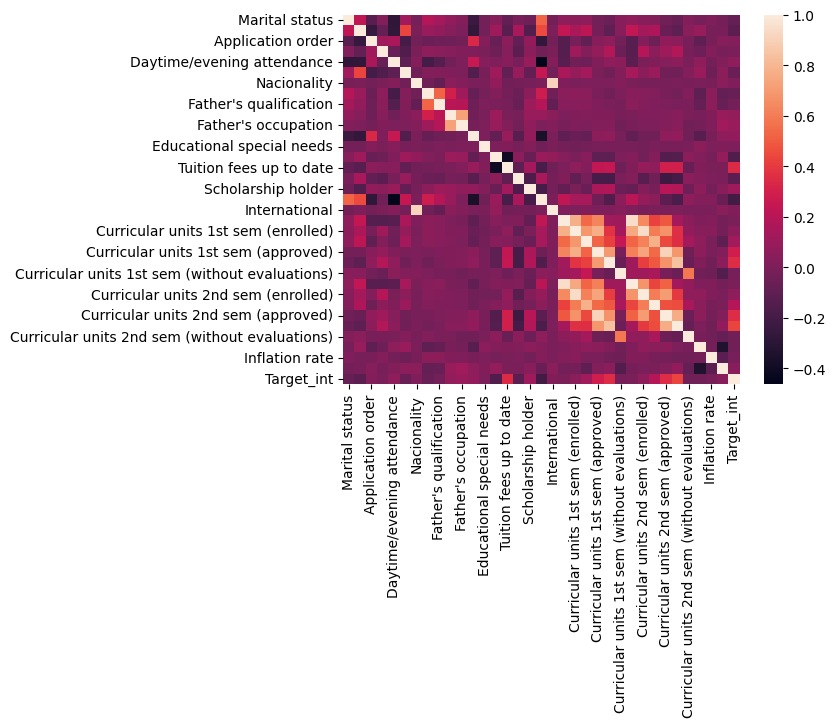

In [5]:
from seaborn import heatmap
heatmap(data=df.drop(columns=['Target']).corr())

Let's look at the correlations if we drop Target = Enrolled.

<Axes: >

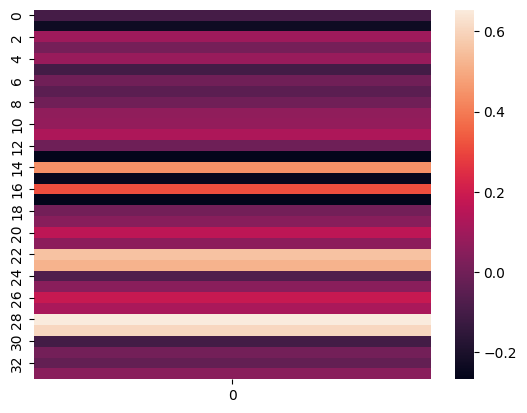

In [6]:
binary_df = df[df['Target'] != 'Enrolled']
heatmap(data=binary_df.drop(columns=['Target', 'Target_int']).corrwith(axis='rows',other=binary_df['Target_int'], ).values.reshape(binary_df.shape[1]-2, 1))

In [7]:
binary_df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   7
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        19
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                29
Father's occupation                                42
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [8]:
len([column for column, value in binary_df.nunique().items() if value < 11])

16

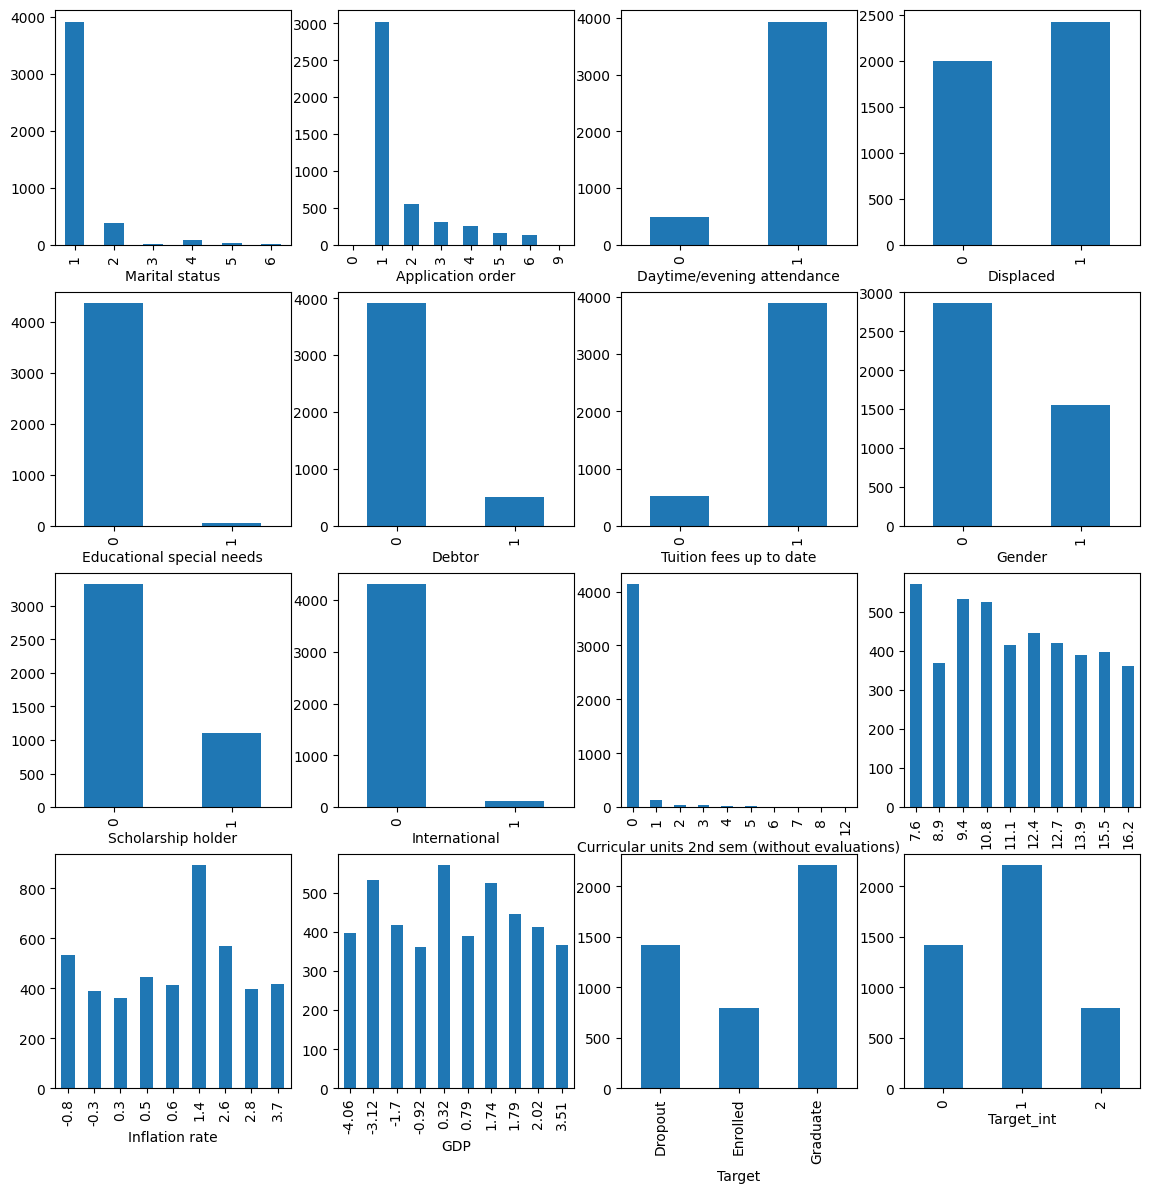

In [9]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(14, 14), ncols=4, nrows=4)
for index, column in enumerate([column for column, value in binary_df.nunique().items() if value < 11]):
    df[column].value_counts().sort_index().plot(ax=ax.ravel()[index], kind='bar')